# **CONCEPT SUPER RESOLUTION VIDEO CONVERTER**

In [ ]:
import os
import re
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
# np.random.seed(0)

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import tensorflow as tf
print(tf.__version__)

2.2.0


**MODEL - AUTOENCODER**

In [ ]:
input_img = Input(shape=(256,256,3))
l1 = Conv2D(64,(3,3), padding='same', activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(input_img)
l2=Conv2D(64,(3,3), padding='same', activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l1)
l3=MaxPooling2D(padding='same')(l2)
l4=Conv2D(128,(3,3), padding='same', activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l3)
l5=Conv2D(128,(3,3), padding='same', activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l4)
l6=MaxPooling2D(padding='same')(l5)
l7 = Conv2D(256,(3,3), padding='same', activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l6)

In [ ]:
l8 = UpSampling2D()(l7)
l9 = Conv2D(128,(3,3),padding='same',activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l8)
l10 = Conv2D(128,(3,3),padding='same',activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l9)
l11 = add([l5,l10])
l12=UpSampling2D()(l11)
l13 = Conv2D(64,(3,3),padding='same',activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l12)
l14 = Conv2D(64,(3,3),padding='same',activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l13)
l15=add([l14,l2])
decoded = Conv2D(3,(3,3),padding='same',activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l15)
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
autoencoder.compile(optimizer='adadelta',loss='mean_squared_error')


In [ ]:
# !cd "/content/frames/"

**FRAMES FROM SAMPLE VIDEO**

In [ ]:
import cv2
vidcap = cv2.VideoCapture('video.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite(r"image%d.jpg"%count, image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 0.1 #//it will capture image in each 0.1 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

**DOWNSIZE IMAGES TO CREATE LOW RESOLUTION VIDEO**

In [ ]:

from skimage.transform import resize, rescale
from cv2 import resize as rs
# from numba import jit, cuda
# 718 750
def train_batches(just_load_dataset=True):

    x_train_n = []
    x_train_down = []

    
    data_path = r"/content/"
    c=0
    for root, dirnames, filenames in os.walk(data_path):
        filenames = list(filenames)
        filenames = [x for x in filenames if x[0]=='i']
        filenames.sort(key = lambda x: x[5:-4])
        for filename in filenames:
            if re.search("\.(jpg|jpeg|JPEG|png|bmp|tiff)$", filename):
                filepath = os.path.join(root, filename)
                image = pyplot.imread(filepath)      
                image_resized = resize(image, (256, 256)) # Resize the image so that every image is the same size
                x_train_n.append(image_resized) # Add this image to the high res dataset
                x_train_down.append(np.array(rs(rs(image_resized, (128,128)), (256,256)))) # Rescale it 0.5x and 2x so that it is a low res image but still has 256x256 resolution
                print(c,end = " ,")
                c+=1
        break
    return x_train_n, x_train_down

In [ ]:
x_train_n, x_train_down = train_batches(just_load_dataset=True)

0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,51 ,52 ,53 ,54 ,55 ,56 ,57 ,58 ,59 ,60 ,61 ,62 ,63 ,64 ,65 ,66 ,67 ,68 ,69 ,70 ,71 ,72 ,73 ,74 ,75 ,76 ,77 ,78 ,79 ,80 ,81 ,82 ,83 ,84 ,85 ,86 ,87 ,88 ,89 ,90 ,91 ,92 ,93 ,94 ,95 ,96 ,97 ,98 ,99 ,100 ,101 ,102 ,103 ,104 ,105 ,106 ,107 ,108 ,109 ,110 ,111 ,112 ,113 ,114 ,115 ,116 ,117 ,118 ,119 ,120 ,121 ,122 ,123 ,124 ,125 ,126 ,127 ,128 ,129 ,130 ,131 ,132 ,133 ,134 ,135 ,136 ,137 ,138 ,139 ,140 ,141 ,142 ,143 ,144 ,145 ,146 ,147 ,148 ,149 ,150 ,151 ,152 ,153 ,154 ,155 ,156 ,157 ,158 ,159 ,160 ,161 ,162 ,163 ,164 ,165 ,166 ,167 ,168 ,169 ,170 ,171 ,172 ,173 ,174 ,175 ,176 ,177 ,178 ,179 ,180 ,181 ,182 ,183 ,184 ,185 ,186 ,187 ,188 ,189 ,190 ,191 ,

In [ ]:
len(x_train_down)

192

**LOW RES VIDEO FROM FRAMES**

In [ ]:
# x_train_down

In [ ]:
import cv2
path_out = 'low.avi'
fps = 10

image_low = np.array(x_train_down)

height, width, layers = image_low[0].shape
size = (width,height)

out = cv2.VideoWriter(path_out,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(image_low)):
    # writing to a image array
    out.write((image_low[i]*255).astype(np.uint8))
out.release()

In [ ]:
np.array(x_train_down).shape

(192, 256, 256, 3)

### *A SINGLE LOW RES FRAME*

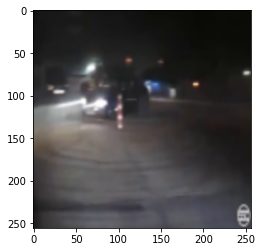

In [ ]:
plt.imshow((image_low*255).astype(np.uint8))

LOAD MODEL'S WEIGHTS

In [ ]:
autoencoder.load_weights("/content/sr.img_net.mse.final_model5.patch.weights.best.hdf5")

USE MODEL TO GENERATE HIGH RESOLUTION FRAMES FROM LOW RESOLUTION FRAMES

In [ ]:
preds = np.clip(autoencoder.predict(np.array(x_train_down)),0.0,1.0)

A SINGLE HIGH RES FRAME

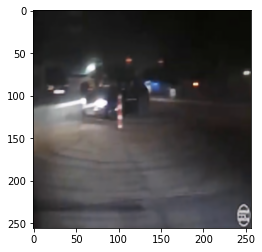

In [ ]:
plt.imshow(preds[0])

GENERATING VIDEO FROM HIGH RES FRAMES

In [ ]:
import cv2
path_out = 'high.avi'
fps = 10

image_high = np.array(preds)

height, width, layers = image_high[0].shape
size = (width,height)

out = cv2.VideoWriter(path_out,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(image_high)):
    # writing to a image array
    out.write((image_high[i]*255).astype(np.uint8))
out.release()